In [8]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

In [9]:
data_RO_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_sea.csv')
data_RO_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_nacl.csv')
data_RO_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_simple.csv')
data_RO_reatoro = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_RO_reaktoro.csv')

In [10]:
data_MVC_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_sea.csv')
data_MVC_nacl = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_nacl.csv')
data_MVC_simple = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\tech_data\data_MVC_simple.csv')

In [11]:
sea_color = "#FFD046"
nacl_color = "#4A7B9D"
simple_color = "#467740"
reaktoro_color = "#C73E1D"

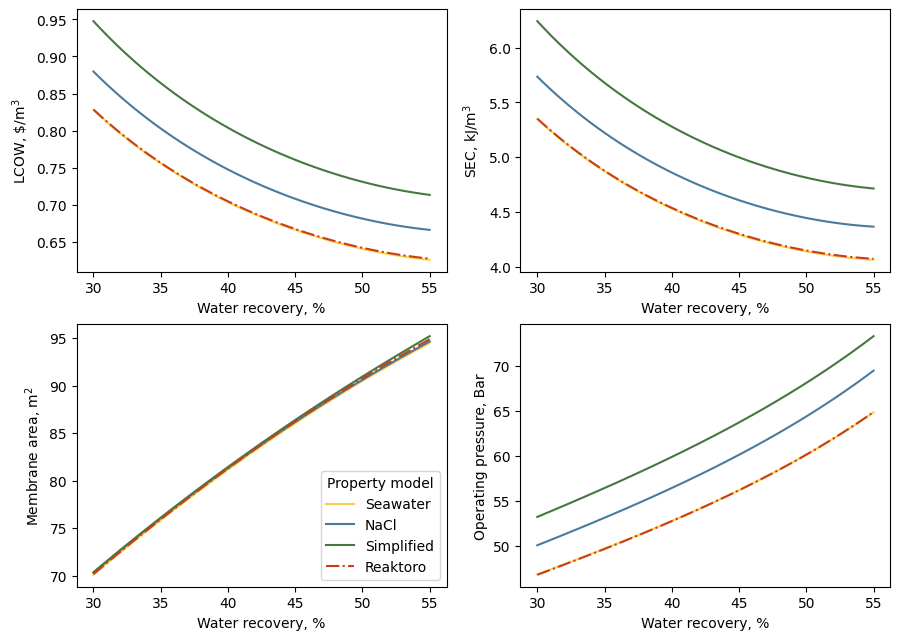

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*3, 2.5*3)) #figsize=(3.5, 2.5)

axs[0,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], color=nacl_color)
axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
axs[0,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['LCOW'], "-.", color=reaktoro_color)
axs[0,0].set_xlabel("Water recovery, %")
axs[0,0].set_ylabel("LCOW, $\$$/m$^3$")

axs[0,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['SEC'], color=nacl_color)
axs[0,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['SEC'], color=simple_color)
axs[0,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['SEC'], "-.", color=reaktoro_color)
axs[0,1].set_xlabel("Water recovery, %")
axs[0,1].set_ylabel("SEC, kJ/m$^{3}$")

axs[1,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Membrane Area'], color=sea_color)
axs[1,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Membrane Area'], color=nacl_color)
axs[1,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Membrane Area'], color=simple_color)
axs[1,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Membrane Area'], "-.", color=reaktoro_color)
axs[1,0].set_xlabel("Water recovery, %")
axs[1,0].set_ylabel("Membrane area, m$^{2}$")

axs[1,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Operating Pressure']/1e5, color=sea_color)
axs[1,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
axs[1,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Operating Pressure']/1e5, color=simple_color)
axs[1,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Operating Pressure']/1e5, "-.", color=reaktoro_color)

axs[1,1].set_xlabel("Water recovery, %")
axs[1,1].set_ylabel("Operating pressure, Bar")

axs[1,0].legend(["Seawater","NaCl","Simplified", "Reaktoro"],title="Property model", loc="lower right")

fig.savefig("RO_comparison_reaktoro_AICHE")


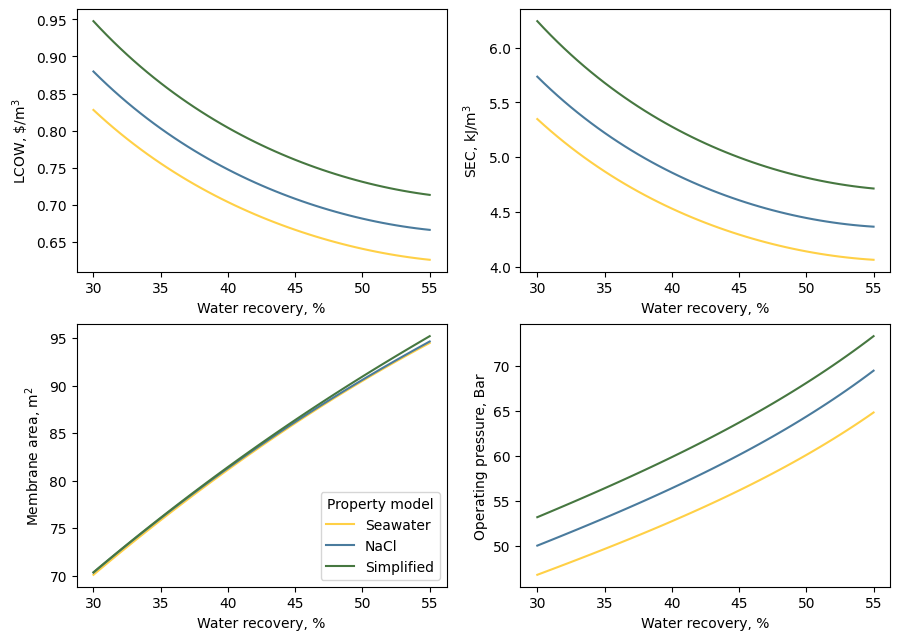

In [13]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*3, 2.5*3)) #figsize=(3.5, 2.5)

axs[0,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['LCOW'], color=sea_color)
axs[0,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['LCOW'], color=nacl_color)
axs[0,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['LCOW'], color=simple_color)
# axs[0,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['LCOW'], "-.", color=reaktoro_color)
axs[0,0].set_xlabel("Water recovery, %")
axs[0,0].set_ylabel("LCOW, $\$$/m$^3$")

axs[0,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['SEC'], color=sea_color)
axs[0,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['SEC'], color=nacl_color)
axs[0,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['SEC'], color=simple_color)
# axs[0,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['SEC'], "-.", color=reaktoro_color)
axs[0,1].set_xlabel("Water recovery, %")
axs[0,1].set_ylabel("SEC, kJ/m$^{3}$")

axs[1,0].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Membrane Area'], color=sea_color)
axs[1,0].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Membrane Area'], color=nacl_color)
axs[1,0].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Membrane Area'], color=simple_color)
# axs[1,0].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Membrane Area'], "-.", color=reaktoro_color)
axs[1,0].set_xlabel("Water recovery, %")
axs[1,0].set_ylabel("Membrane area, m$^{2}$")

axs[1,1].plot(data_RO_seawater['# Water Recovery']*100, data_RO_seawater['Operating Pressure']/1e5, color=sea_color)
axs[1,1].plot(data_RO_nacl['# Water Recovery']*100, data_RO_nacl['Operating Pressure']/1e5, color=nacl_color)
axs[1,1].plot(data_RO_simple['# Water Recovery']*100, data_RO_simple['Operating Pressure']/1e5, color=simple_color)
# axs[1,1].plot(data_RO_reatoro['# Water Recovery']*100, data_RO_reatoro['Operating Pressure']/1e5, "-.", color=reaktoro_color)

axs[1,1].set_xlabel("Water recovery, %")
axs[1,1].set_ylabel("Operating pressure, Bar")

axs[1,0].legend(["Seawater","NaCl","Simplified"],title="Property model", loc="lower right")

fig.savefig("RO_comparison_AICHE")

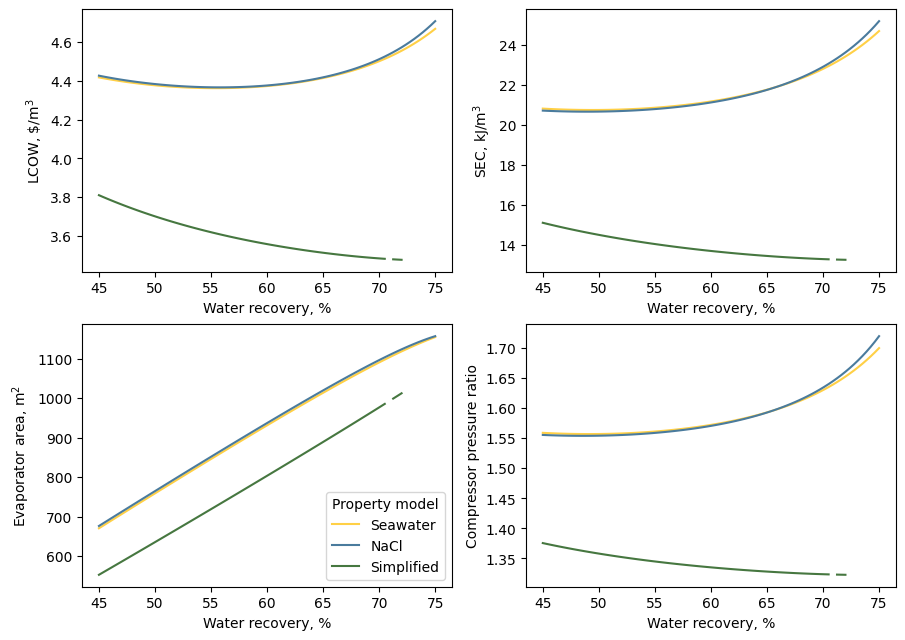

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5*3, 2.5*3))

data_MVC_seawater_low = data_MVC_seawater[(data_MVC_seawater["Inlet Salinity"] == 3.500000e-02) ]
data_MVC_nacl_low = data_MVC_nacl[(data_MVC_nacl["Inlet Salinity"] == 3.500000e-02) ]
data_MVC_simple_low = data_MVC_simple[(data_MVC_simple["Inlet Salinity"] == 3.500000e-02) ]

data_MVC_seawater_hi = data_MVC_seawater[(data_MVC_seawater["Inlet Salinity"] == 7.000000e-02) ]
data_MVC_nacl_hi = data_MVC_nacl[(data_MVC_nacl["Inlet Salinity"] == 7.000000e-02) ] 
data_MVC_simple_hi = data_MVC_simple[(data_MVC_simple["Inlet Salinity"] == 7.000000e-02) ] 

# axs[0,0].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['LCOW'])
# axs[0,0].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['LCOW'])
# axs[0,0].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['LCOW'])
axs[0,0].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['LCOW'], color=sea_color)
axs[0,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['LCOW'], color=nacl_color)
axs[0,0].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['LCOW'], color=simple_color)

axs[0,0].set_xlabel("Water recovery, %")
axs[0,0].set_ylabel("LCOW, $\$$/m$^3$")

# axs[0,1].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['SEC'])
# axs[0,1].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['SEC'])
# axs[0,1].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['SEC'])
axs[0,1].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['SEC'], color=sea_color)
axs[0,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['SEC'], color=nacl_color)
axs[0,1].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['SEC'], color=simple_color)

axs[0,1].set_xlabel("Water recovery, %")
axs[0,1].set_ylabel("SEC, kJ/m$^{3}$")

# axs[1,0].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['Evaporator area'])
# axs[1,0].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['Evaporator area'])
# axs[1,0].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['Evaporator area'])
axs[1,0].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['Evaporator area'], color=sea_color)
axs[1,0].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Evaporator area'], color=nacl_color)
axs[1,0].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['Evaporator area'], color=simple_color)

axs[1,0].set_xlabel("Water recovery, %")
axs[1,0].set_ylabel("Evaporator area, m$^{2}$")

# axs[1,1].plot(data_MVC_seawater_low['# Water Recovery']*100, data_MVC_seawater_low['Compressor pressure ratio'])
# axs[1,1].plot(data_MVC_nacl_low['# Water Recovery']*100, data_MVC_nacl_low['Compressor pressure ratio'])
# axs[1,1].plot(data_MVC_simple_low['# Water Recovery']*100, data_MVC_simple_low['Compressor pressure ratio'])
axs[1,1].plot(data_MVC_seawater_hi['# Water Recovery']*100, data_MVC_seawater_hi['Compressor pressure ratio'], color=sea_color)
axs[1,1].plot(data_MVC_nacl_hi['# Water Recovery']*100, data_MVC_nacl_hi['Compressor pressure ratio'], color=nacl_color)
axs[1,1].plot(data_MVC_simple_hi['# Water Recovery']*100, data_MVC_simple_hi['Compressor pressure ratio'], color=simple_color)

axs[1,1].set_xlabel("Water recovery, %")
axs[1,1].set_ylabel("Compressor pressure ratio")

axs[1,0].legend(["Seawater","NaCl","Simplified"],title="Property model", loc="lower right")

fig.savefig("MVC_comparison_AICHE")